In [1]:
#import qutip
from qutip import *
qutip.about()
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib

%matplotlib inline


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.4
Numpy Version:      2.1.1
Scipy Version:      1.14.1
Cython Version:     None
Matplotlib Version: 3.9.2
Python Version:     3.12.2
Number of CPUs:     16
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/ubuntu-compute/miniconda3/envs/qdev/lib/python3.12/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference ca

In [2]:
print(Qobj([[1],[2],[3],[4],[5]]))
Qobj([[1],[2],[3],[4],[5]])
 	
d = 2

state = basis(d,0)
#state
 	

raising = create(d)
#raising

lowering = destroy(d)
#lowering

state

#state = raising*state

lowering*state


Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]]

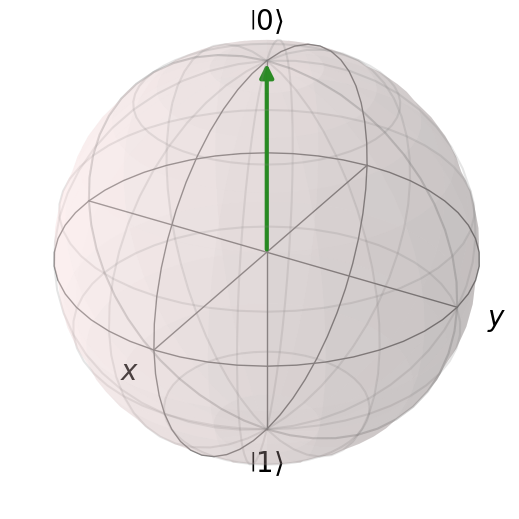

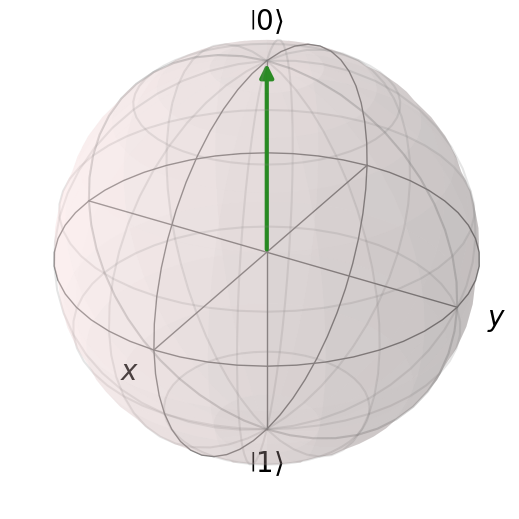

In [3]:
#basis(d,0)
#%matplotlib inline
b = Bloch()
b.add_states(state)
b.show()
#b.make_sphere()


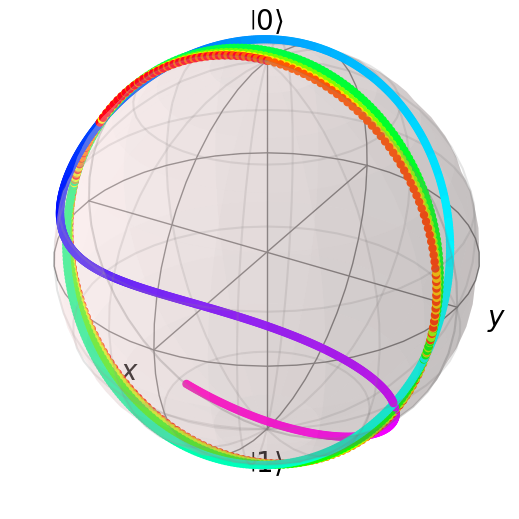

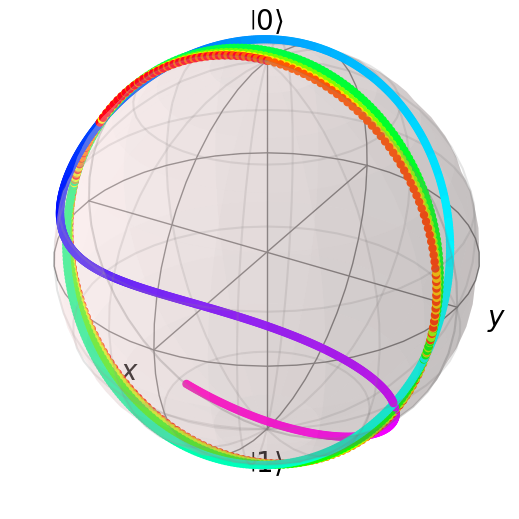

In [4]:
psi0 = state
coeff = lambda t: np.cos(t*2e1)*50
H0 = 2*np.pi * 1e1 * sigmaz()
#H = 2*np.pi * 1e1 * sigmax() + 2*np.pi * 1e2 * sigmaz()
H1 = [2*np.pi * sigmax(), coeff]
#H = [H0, H1]
#from qutip import QObjEvo
H =  QobjEvo([H0, H1])

times = np.linspace(0.0, 1e-1, 2000)
solver = SESolver(H)
result = solver.run(psi0, times, e_ops=[sigmax(), sigmay(), sigmaz()])
b = Bloch()
x,y,z = result.expect[0], result.expect[1], result.expect[2]
cmap = plt.get_cmap('gist_rainbow')
b.add_points([x,y,z],colors = list(map(cmap, np.linspace(0,1,len(x)))))
b.show()


MovieWriter imagemagick unavailable; using Pillow instead.


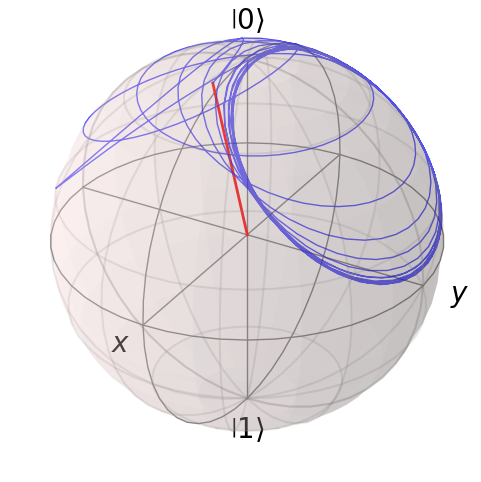

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from qutip import Bloch, Qobj, QobjEvo, SESolver, sigmax, sigmay, sigmaz

# Initial state and Hamiltonian
"""psi0 = Qobj([1, 0])  # Initial state |0>
coeff = lambda t: np.cos(t * 5e1) * 50
coeff = lambda t: 10
H0 = 2 * np.pi * 1e1 * sigmaz()
H1 = [2 * np.pi * sigmax(), coeff]
H = QobjEvo([H0, H1])"""

#have some hammiltonian and pertubation that makes the state go wild
psi0 = Qobj([1, 0])  # Initial state |0>
H0 = 2*np.pi * 5e1 * sigmaz()
H1 = [2*np.pi * sigmax()+sigmaz(), lambda t: np.cos(t*2e1)*50*np.exp(t*10)]
H =  QobjEvo([H0, H1])


# Solver parameters
times = np.linspace(0.0, 1e-1, 500)
solver = SESolver(H)
result = solver.run(psi0, times, e_ops=[sigmax(), sigmay(), sigmaz()])

# Expectation values for x, y, z components
x, y, z = result.expect[0], result.expect[1], result.expect[2]

# Set up the Bloch sphere
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(6, 6))
bloch = Bloch(fig=fig, axes=ax)
bloch.make_sphere()

# Initialize the vector and trajectory
vector, = ax.plot([0, x[0]], [0, y[0]], [0, z[0]], color='r', lw=2)  # Current vector
trajectory, = ax.plot([], [], [], color='b', lw=1, alpha=0.7)  # Trajectory line

# Initialization function
def init():
    vector.set_data_3d([0, x[0]], [0, y[0]], [0, z[0]])
    trajectory.set_data_3d([], [], [])
    return vector, trajectory

# Update function
def update(frame):
    # Update the current vector
    vector.set_data_3d([0, x[frame]], [0, y[frame]], [0, z[frame]])
    
    # Update the trajectory line to include all previous points
    trajectory.set_data_3d(x[:frame+1], y[:frame+1], z[:frame+1])
    return vector, trajectory

# Create the animation
fps = 30
interval = 500 / fps  # Milliseconds per frame
anim = FuncAnimation(fig, update, frames=len(times), init_func=init, blit=True, interval=interval)

# Display the animation as HTML5 video
#from IPython.display import HTML
#HTML(anim.to_jshtml())

# Save the animation as a GIF
anim.save('bloch_sphere_with_trajectory.gif', writer='imagemagick', fps=fps)


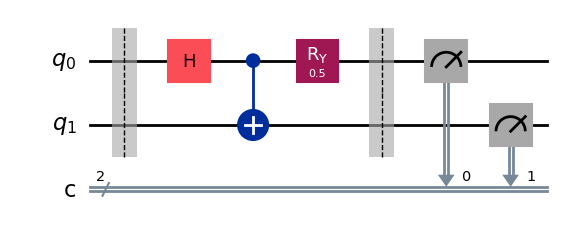

In [2]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.barrier()

# Apply a Hadamard gate on qubit 0
qc.h(0)

# Apply a CNOT gate with control on qubit 0 and target on qubit 1
qc.cx(0, 1)

# Apply a Ry rotation gate on qubit 0 with parameter θ
theta = 0.5  # Replace with your desired value for θ
qc.ry(theta, 0)

# Add barriers for clarity
qc.barrier()

# Measure qubit 0 into classical bit 0
qc.measure(0, 0)

# Measure qubit 1 into classical bit 1
qc.measure(1, 1)

# Draw the circuit
qc.draw(output='mpl')


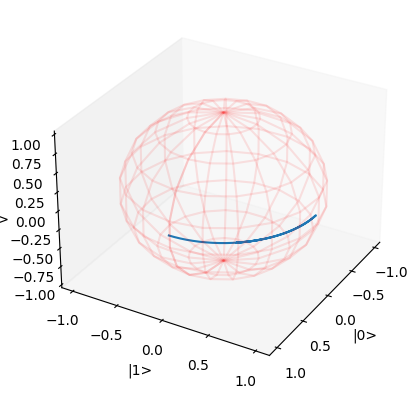

In [5]:
#now do simular, but with more than two energyscales
energies = np.array([0, 1, 2])
H0 = np.diag(energies)
eigenEnergies, eigenStates = np.linalg.eigh(H0)
H0 = Qobj(H0)

#now do a pertubation, that couples the energy levels
#start by supposing a very idealized (nonhermitian) pertubation
coeff = lambda t: np.cos(t*2e1)*50
H1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]])
H1 = [Qobj(H1), coeff]
H =  QobjEvo([H0, H1])

times = np.linspace(0.0, 1e-1, 20000)
solver = SESolver(H)
psi0 = Qobj(eigenStates[0])
silly_expect = [Qobj(np.diag(np.array([1, 0, 0]))), Qobj(np.diag(np.array([0, 1, 0]))), Qobj(np.diag(np.array([0, 0, 1])))]
result = solver.run(psi0, times, e_ops=silly_expect) 
#make 3d plot over the three energy levels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(result.expect[0]**(1/2), result.expect[1]**(1/2), result.expect[2]**(1/2))
#put in a sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r",alpha=0.1)
#axis titles of |0>, |1>, |2>
ax.set_xlabel("|0>")
ax.set_ylabel("|1>")
ax.set_zlabel("|2>")
#turn off the grid
ax.grid(False)
# turn the plot angle
ax.view_init(30, 30)
plt.show()




In [ ]:
#now do simular, but with imported hamiltonian
H0 = Qobj(np.load("HDiag_fluxonium.npy"))
xCoup = np.load("coupling_phi_fluxonium.npy")
pCoup = np.load("coupling_n_fluxonium.npy")

#now do a pertubation, that couples the energy levels
#start by supposing a very idealized (nonhermitian) pertubation
coeff = lambda t: np.sin(t*(H0[1][1]-H0[0][0]))*50
H1 = [Qobj(-pCoup), coeff]
H =  QobjEvo([H0, H1])


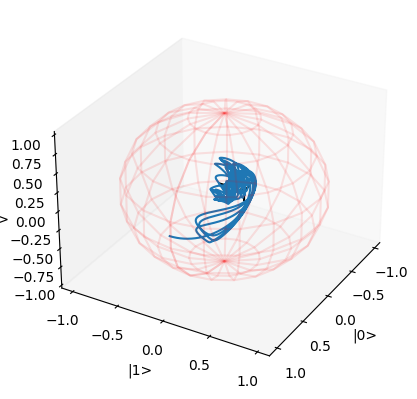

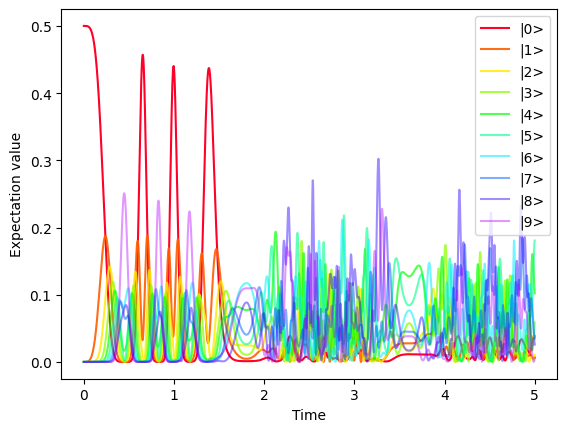

In [7]:


times = np.linspace(0.0, 5e-0, 20000)
solver = SESolver(H)
psi0 = np.zeros(H0.shape[0])
psi0[0] = 1
psi0 = Qobj(psi0)
stateExpects = []
for i in range(H0.shape[0]):
    stateExpects.append(Qobj(np.diag(np.array([0]*i + [1] + [0]*(H0.shape[0]-i-1)))))
silly_expect = stateExpects[:3]
result = solver.run(psi0, times, e_ops=stateExpects) 
#make 3d plot over the three energy levels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(result.expect[0]**(1/2), result.expect[1]**(1/2), result.expect[2]**(1/2))
#plot the last point with cardinal lines to the origin
last = [result.expect[0][-1]**(1/2), result.expect[1][-1]**(1/2), result.expect[2][-1]**(1/2)]
ax.plot([0, last[0]], [last[1], last[1]], [last[2], last[2]], color="black", linestyle="--", zorder=0)
ax.plot([last[0], last[0]], [0, last[1]], [last[2], last[2]], color="black", linestyle="--", zorder=0)
ax.plot([last[0], last[0]], [last[1], last[1]], [0, last[2]], color="black", linestyle="--", zorder=0)
#put in a sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r",alpha=0.1)
#axis titles of |0>, |1>, |2>
ax.set_xlabel("|0>")
ax.set_ylabel("|1>")
ax.set_zlabel("|2>")
#turn off the grid
ax.grid(False)
# turn the plot angle
ax.view_init(30, 30)
plt.show()

#plot expectation values of states as a function of time
fig, ax = plt.subplots()
cmap = plt.get_cmap('gist_rainbow')
for i in range(10):
    ax.plot(times, result.expect[i]*(1/2), label = f"|{i}>", color = cmap(i*1e-1), alpha = np.exp(-i*1e-1))
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Expectation value")
plt.show()




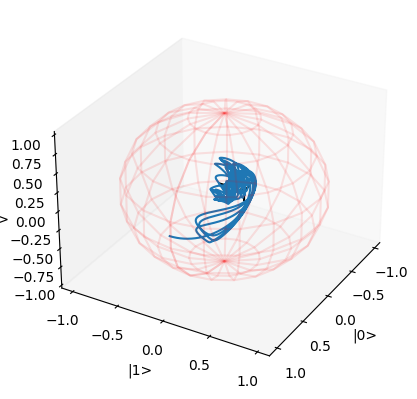

In [13]:


times = np.linspace(0.0, 5e-0, 20000)
solver = SESolver(H)
psi0 = np.zeros(H0.shape[0])
psi0[0] = 1
psi0 = Qobj(psi0)
stateExpects = []
for i in range(H0.shape[0]):
    stateExpects.append(Qobj(np.diag(np.array([0]*i + [1] + [0]*(H0.shape[0]-i-1)))))
silly_expect = stateExpects[:3]
result = solver.run(psi0, times, e_ops=stateExpects) 
#make 3d plot over the three energy levels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(result.expect[0]**(1/2), result.expect[1]**(1/2), result.expect[2]**(1/2))
#plot the last point with cardinal lines to the origin
last = [result.expect[0][-1]**(1/2), result.expect[1][-1]**(1/2), result.expect[2][-1]**(1/2)]
ax.plot([0, last[0]], [last[1], last[1]], [last[2], last[2]], color="black", linestyle="--", zorder=0)
ax.plot([last[0], last[0]], [0, last[1]], [last[2], last[2]], color="black", linestyle="--", zorder=0)
ax.plot([last[0], last[0]], [last[1], last[1]], [0, last[2]], color="black", linestyle="--", zorder=0)
#put in a sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r",alpha=0.1)
#axis titles of |0>, |1>, |2>
ax.set_xlabel("|0>")
ax.set_ylabel("|1>")
ax.set_zlabel("|2>")
#turn off the grid
ax.grid(False)
# turn the plot angle
ax.view_init(30, 30)
plt.show()





MovieWriter imagemagick unavailable; using Pillow instead.


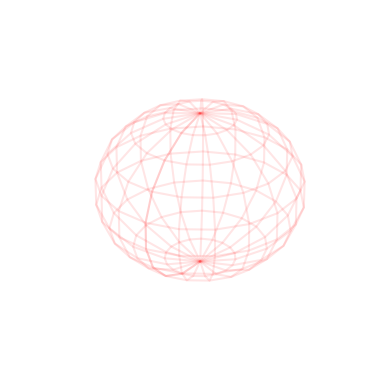

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from qutip import Qobj, SESolver, QobjEvo

# Load Hamiltonian and coupling matrices
H0 = Qobj(np.load("HDiag_fluxonium.npy"))
xCoup = np.load("coupling_phi_fluxonium.npy")
pCoup = np.load("coupling_n_fluxonium.npy")

# Perturbation that couples energy levels
coeff = lambda t: np.sin(t * (H0[1][1] - H0[0][0])) * 50
H1 = [Qobj(-xCoup+pCoup*3), coeff]
H = QobjEvo([H0, H1])

# Solver parameters
times = np.linspace(0.0, 1e-0, 300)
solver = SESolver(H)
psi0 = np.zeros(H0.shape[0])
psi0[0] = 1
psi0 = Qobj(psi0)

# Define projection operators for expectation values
stateExpects = []
for i in range(H0.shape[0]):
    proj = np.zeros((H0.shape[0], H0.shape[0]))
    proj[i, i] = 1
    stateExpects.append(Qobj(proj))

# Run the solver to get expectation values
result = solver.run(psi0, times, e_ops=stateExpects)

# Data for 3D plot animation
x_data = result.expect[0] ** (1 / 2)
y_data = result.expect[1] ** (1 / 2)
z_data = result.expect[2] ** (1 / 2)

# Set up the figure for the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the sphere
u, v = np.mgrid[0 : 2 * np.pi : 20j, 0 : np.pi : 10j]
x_sphere = np.cos(u) * np.sin(v)
y_sphere = np.sin(u) * np.sin(v)
z_sphere = np.cos(v)
ax.plot_wireframe(x_sphere, y_sphere, z_sphere, color="r", alpha=0.1)

# Initialize the plot elements
line, = ax.plot([], [], [], label="Trajectory")
point, = ax.plot([], [], [], "ro")

# Axis labels
ax.set_xlabel("|0>")
ax.set_ylabel("|1>")
ax.set_zlabel("|2>")
ax.view_init(30, 30)

# Initialization function for the animation
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    #point.set_data([], [])
    #point.set_3d_properties([])
    return line, point

# Update function for the animation
def update(frame):
    line.set_data(x_data[:frame], y_data[:frame])
    line.set_3d_properties(z_data[:frame])
    #point.set_data(x_data[frame], y_data[frame])
    #point.set_3d_properties(z_data[frame])
    return line, point

#remove axes
ax.grid(False)
ax.set_axis_off()


# Create the animation
fps = 30  # Frames per second
interval = 1000 / fps  # Calculate interval in ms based on desired FPS
anim = FuncAnimation(fig, update, frames=len(times), init_func=init, blit=False, interval=interval)

#use html5 for animation
from IPython.display import HTML
HTML(anim.to_html5_video())

#save as gif
anim.save("animation.gif", writer="imagemagick", fps=fps)


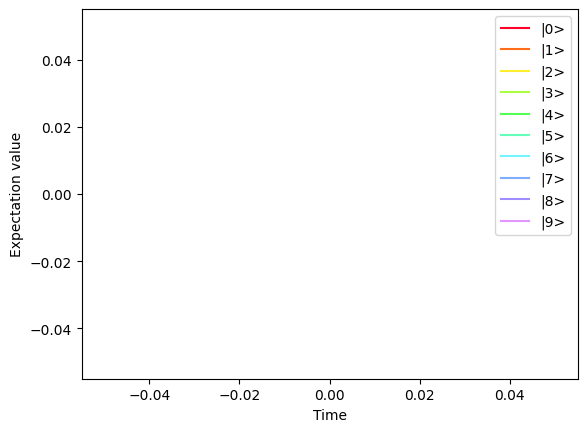

In [8]:
#previous code pannel, but animated
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
cmap = plt.get_cmap('gist_rainbow')
lines = []
for i in range(10):
    lines.append(ax.plot([], [], label = f"|{i}>", color = cmap(i*1e-1), alpha = np.exp(-i*1e-1))[0])
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Expectation value")
def update(frame):
    for i in range(10):
        lines[i].set_data(times[:frame], result.expect[i][:frame]*(1/2))
    return lines
ani = FuncAnimation(fig, update, frames=range(len(times)), blit=True)
plt.show()
